In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import json
from scipy.stats import sem, ttest_ind

In [2]:
# Path to csv file
file_path = "../Resources/General/campaigns.csv"

In [3]:
# Making DataFrame of General data
general_df = pd.read_csv(file_path)
general_df.head()

,Status,Campaign Name,Type,Start Date,End Date,Budget,Spend,Impressions,Clicks,Average CPC,Detail Page View,Total Sales,ACoS
0,Terminated,Xperia X Launch - PD - Brand Products - 6/30-7/16,Product Display,2016/07/01,2016/07/17,500,95.85,"130,734",200,0.48,469,539.99,17.75%
1,Terminated,Xperia X Launch - PD - Comp Brand - 6/30-7/16,Product Display,2016/07/01,2016/07/31,500,131.77,"186,466",271,0.49,443,0.00,-
2,Terminated,Xperia X Launch - PD - Comp Brand - 6/30-7/16,Product Display,2016/07/01,2016/07/17,500,68.79,"127,746",144,0.48,289,549.99,12.51%
3,Terminated,"Sony Mobile Communications, (U 06/30/2016",Product Display,2016/07/01,2016/07/17,250,250.00,"769,913",280,0.89,340,0.00,-
4,Ended,Xperia X Launch - PD - Comp Brand - Copy 1 - 7...,Product Display,2016/07/03,2016/07/19,149,149.00,"184,495",304,0.49,612,"2,375.18",6.27%


In [4]:
# Convert strings to Float
general_df["Spend"] = general_df["Spend"].replace(",", "", regex=True).astype('float')
general_df["Impressions"] = general_df["Impressions"].replace([",", "-"], ["", "0"], regex=True).astype('float')
general_df["Clicks"] = general_df["Clicks"].replace([",", "-"], ["", "0"], regex=True).astype('float')
general_df["Spend"] = general_df["Spend"].replace(",", "", regex=True).astype('float')
general_df["Total Sales"] = general_df["Total Sales"].replace([",", "-"], ["", "0"], regex=True).astype('float')

In [5]:
# Add CPI, CPC
general_df["CPM"] = general_df["Spend"] / general_df["Impressions"]*1000
general_df["CPC"] = general_df["Spend"] / general_df["Clicks"]
general_df["CPS"] = general_df["Spend"] / general_df["Total Sales"]
general_df.head()

,Status,Campaign Name,Type,Start Date,End Date,Budget,Spend,Impressions,Clicks,Average CPC,Detail Page View,Total Sales,ACoS,CPM,CPC,CPS
0,Terminated,Xperia X Launch - PD - Brand Products - 6/30-7/16,Product Display,2016/07/01,2016/07/17,500,95.85,130734.0,200.0,0.48,469,539.99,17.75%,0.733168,0.479250,0.177503
1,Terminated,Xperia X Launch - PD - Comp Brand - 6/30-7/16,Product Display,2016/07/01,2016/07/31,500,131.77,186466.0,271.0,0.49,443,0.00,-,0.706670,0.486236,inf
2,Terminated,Xperia X Launch - PD - Comp Brand - 6/30-7/16,Product Display,2016/07/01,2016/07/17,500,68.79,127746.0,144.0,0.48,289,549.99,12.51%,0.538490,0.477708,0.125075
3,Terminated,"Sony Mobile Communications, (U 06/30/2016",Product Display,2016/07/01,2016/07/17,250,250.00,769913.0,280.0,0.89,340,0.00,-,0.324712,0.892857,inf
4,Ended,Xperia X Launch - PD - Comp Brand - Copy 1 - 7...,Product Display,2016/07/03,2016/07/19,149,149.00,184495.0,304.0,0.49,612,2375.18,6.27%,0.807610,0.490132,0.062732


In [6]:
#Making DataFrame for each type of AMS
pro_df = general_df[general_df["Type"] == "Product Display"]
spo_df = general_df[general_df["Type"] == "Sponsored Products"]
head_df = general_df[general_df["Type"] == "Headline Search"]

In [7]:
# Cost - Sales Analysis
# Cost sum
spend_pro = (pro_df["Spend"].sum() / 1000).round(1)
spend_spo = (spo_df["Spend"].sum() / 1000).round(1)
spend_head = (head_df["Spend"].sum() / 1000).round(1)

# Sales sum
sales_pro = (pro_df["Total Sales"].sum() / 1000).round(1)
sales_spo = (spo_df["Total Sales"].sum() / 1000).round(1)
sales_head = (head_df["Total Sales"].sum() / 1000).round(1)

# Sales per Spend
cost_per_sale_pro = spend_pro / sales_pro * 100
cost_per_sale_spo = spend_spo / sales_spo * 100
cost_per_sale_head = spend_head / sales_head * 100

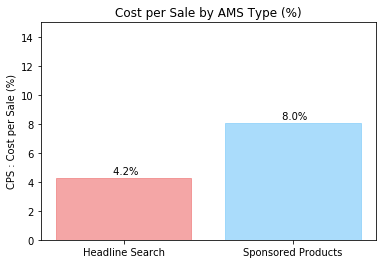

In [8]:
# Plot bar chart for Cost(Spend)
# Define x ticks, x axis, y axis
x_ticks = ["Headline Search", "Sponsored Products"]
x_axis = np.arange(len(x_ticks))
y_axis = [cost_per_sale_head, cost_per_sale_spo]

# Add Title, Add labels to X and Y axes
plt.title("Cost per Sale by AMS Type (%)")
plt.ylabel("CPS : Cost per Sale (%)")

# Plot
bar_plot = plt.bar(x_axis, y_axis, color='r', alpha=0.7, align="center")

# Change the colors
bar_plot[0].set_color('lightcoral')
bar_plot[1].set_color('lightskyblue')

# set y axis limit
plt.ylim(0, 15)

# place value in each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+0.3, " "+str(height.round(1))+"%", color='black', ha='center')

# Place tick names
tick_location = [value for value in x_axis]
plt.xticks(tick_location, x_ticks)

plt.savefig("../Output/AMS_All_CPS_Bar_2.png", bbox_inches="tight")

plt.show()

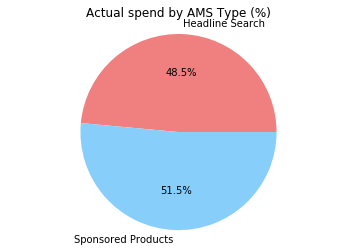

In [9]:
# data for pie chart
pies = ["Headline Search", "Sponsored Products"]
pie_values = [spend_head, spend_spo]
colors = ['lightcoral', 'lightskyblue']

# plot pie chart
plt.pie(pie_values, labels=pies, colors=colors, autopct="%1.1f%%")

# Set title
plt.title("Actual spend by AMS Type (%)")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Output/AMS_All_Spend_Percentage_2.png", bbox_inches="tight")
plt.show()

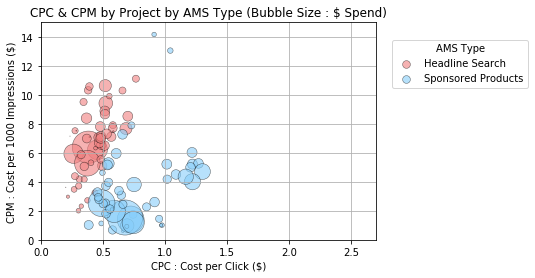

In [10]:
# Making scatter plots
# Add Title, Add labels to X and Y axes
plt.title("CPC & CPM by Project by AMS Type (Bubble Size : $ Spend)")
plt.xlabel("CPC : Cost per Click ($)")
plt.ylabel("CPM : Cost per 1000 Impressions ($)")

# Set the limits for the X and Y axes
plt.xlim(0,2.7) 
plt.ylim(0,15) 

x_head = head_df["CPC"]
y_head = head_df["CPM"]
s_head = head_df["Spend"]

x_spo = spo_df["CPC"]
y_spo = spo_df["CPM"]
s_spo = spo_df["Spend"]

plt.scatter(x_head, y_head, s=s_head*0.05, color="lightcoral", edgecolor="black", alpha=0.6, linewidth=0.5, label='Headline Search')
plt.scatter(x_spo, y_spo, s=s_spo*0.05, color="lightskyblue", edgecolor="black", alpha=0.6, linewidth=0.5, label='Sponsored Products')

handle = plt.legend(title="AMS Type", loc=(1.05, 0.7))
for bubble in handle.legendHandles: 
   bubble.set_sizes([60])

plt.grid()

plt.savefig("../Output/AMS_All_Types_CPC_CPI_Analysis_2.png", bbox_inches="tight")

plt.show()

In [11]:
# Detailed analysis on Headline Search
# Collecting all csv files in folder "Headline_Search"
csv_files = glob.glob('../Resources/Headline_Search/*.csv')
list = []

In [12]:
# concatenate csv files
for csv_file in csv_files:
    list.append(pd.read_csv(csv_file))
hs_df = pd.concat(list, ignore_index=True)

# export to csv files
hs_df.to_csv("../Output/combined_headline_search.csv")
hs_df.head()

,Status,Keywords,Match,CPC Bid,Impr.,Clicks,CTR,ACPC,Spend,Sales,ACoS
0,Enabled,sony x,Phrase,4.0,42,0,0.00%,-,0,0.00,-
1,Enabled,motorola unlocked phones,Phrase,4.0,57,2,3.509%,1.82,3.63,0.00,-
2,Enabled,unlocked smartphones,Phrase,4.0,"1,775",22,1.239%,0.62,13.66,0.00,-
3,Enabled,sony xperia phone,Phrase,4.0,116,4,3.448%,0.20,0.8,0.00,-
4,Enabled,sony xperia xz1 compact,Phrase,4.0,273,5,1.832%,0.42,2.12,0.00,-


In [13]:
#add empty column "Search_Category"
hs_df["Search_Category"] = ""

In [14]:
# Iterate through DataFrame to assign Search Category
for index, row in hs_df.iterrows():
    if row["Keywords"].find("sony") >=0 or \
       row["Keywords"].find("xperia") >=0 or \
       row["Keywords"].find("experia") >=0 or \
       row["Keywords"].find("xz") >=0 or \
       row["Keywords"].find("xa") >=0 or \
       row["Keywords"].find("l1") >=0 or \
       row["Keywords"].find("l2") >=0 or \
       row["Keywords"].find("zx") >=0 or \
       row["Keywords"].find("x compact") >=0 or \
       row["Keywords"].find("xperia x") >=0 or \
       row["Keywords"].find("experia x") >=0 :
        hs_df.at[index, "Search_Category"] = "Brand"
                
    elif row["Keywords"].find("lg") >=0 or \
         row["Keywords"].find("moto") >=0 or \
         row["Keywords"].find("motorola") >=0 or \
         row["Keywords"].find("zte") >=0 or \
         row["Keywords"].find("htc") >=0 or \
         row["Keywords"].find("samsung") >=0 or \
         row["Keywords"].find("galaxy") >=0 or \
         row["Keywords"].find("huawei") >=0 or \
         row["Keywords"].find("asus") >=0 or \
         row["Keywords"].find("nokia") >=0 or \
         row["Keywords"].find("apple") >=0 or \
         row["Keywords"].find("iphone") >=0 or \
         row["Keywords"].find("blackberry") >=0 :
        hs_df.at[index, "Search_Category"] = "Competitor"
                
    elif row["Keywords"].find("verizon") >=0 or \
         row["Keywords"].find("att") >=0 or \
         row["Keywords"].find("at&t") >=0 or \
         row["Keywords"].find("tmobile") >=0 or \
         row["Keywords"].find("t-mobile") >=0 or \
         row["Keywords"].find("tmo") >=0 or \
         row["Keywords"].find("sprint") >=0 or \
         row["Keywords"].find("criket") >=0 or \
         row["Keywords"].find("tracfone") >=0 or \
         row["Keywords"].find("metropcs") >=0 or \
         row["Keywords"].find("metro pcs") >=0 :
        hs_df.at[index, "Search_Category"] = "Carrier"
                
    elif row["Keywords"].find("smartphone") >=0 or \
         row["Keywords"].find("unclocked") >=0 or \
         row["Keywords"].find("unlock") >=0 or \
         row["Keywords"].find("phone") >=0 or \
         row["Keywords"].find("mobile") >=0 or \
         row["Keywords"].find("android") >=0 or \
         row["Keywords"].find("cell") >=0 :
        hs_df.at[index, "Search_Category"] = "Category"
             
    else:
        hs_df.at[index, "Search_Category"] = "Others"       

hs_df.to_csv("../Output/combined_headline_search_w_search_category.csv")
hs_df.head()

,Status,Keywords,Match,CPC Bid,Impr.,Clicks,CTR,ACPC,Spend,Sales,ACoS,Search_Category
0,Enabled,sony x,Phrase,4.0,42,0,0.00%,-,0,0.00,-,Brand
1,Enabled,motorola unlocked phones,Phrase,4.0,57,2,3.509%,1.82,3.63,0.00,-,Competitor
2,Enabled,unlocked smartphones,Phrase,4.0,"1,775",22,1.239%,0.62,13.66,0.00,-,Category
3,Enabled,sony xperia phone,Phrase,4.0,116,4,3.448%,0.20,0.8,0.00,-,Brand
4,Enabled,sony xperia xz1 compact,Phrase,4.0,273,5,1.832%,0.42,2.12,0.00,-,Brand


In [15]:
# converting strings to float
hs_df["Impr."] = hs_df["Impr."].replace([",", "-"], ["", "0"], regex=True).astype('float')
hs_df["Clicks"] = hs_df["Clicks"].replace([",", "-"], ["", "0"], regex=True).astype('float')
hs_df["Spend"] = hs_df["Spend"].replace([",", "-"], ["", "0"], regex=True).astype('float')
hs_df["Sales"] = hs_df["Sales"].replace([",", "-"], ["", "0"], regex=True).astype('float')

In [16]:
# Only rows with Clicks more than zero
hs_df = hs_df.loc[hs_df["Clicks"] > 0]

In [17]:
# Add CPI, CPC
hs_df["CPM"] = hs_df["Spend"] / hs_df["Impr."] * 1000
hs_df["CPC"] = hs_df["Spend"] / hs_df["Clicks"]
hs_df.head()

,Status,Keywords,Match,CPC Bid,Impr.,Clicks,CTR,ACPC,Spend,Sales,ACoS,Search_Category,CPM,CPC
1,Enabled,motorola unlocked phones,Phrase,4.0,57.0,2.0,3.509%,1.82,3.63,0.0,-,Competitor,63.684211,1.815000
2,Enabled,unlocked smartphones,Phrase,4.0,1775.0,22.0,1.239%,0.62,13.66,0.0,-,Category,7.695775,0.620909
3,Enabled,sony xperia phone,Phrase,4.0,116.0,4.0,3.448%,0.20,0.80,0.0,-,Brand,6.896552,0.200000
4,Enabled,sony xperia xz1 compact,Phrase,4.0,273.0,5.0,1.832%,0.42,2.12,0.0,-,Brand,7.765568,0.424000
6,Enabled,xa1 ultra,Phrase,4.0,750.0,33.0,4.40%,0.29,9.46,0.0,-,Brand,12.613333,0.286667


In [18]:
#Making DataFrame for each search term
hs_bra_df = hs_df[hs_df["Search_Category"] == "Brand"]
hs_com_df = hs_df[hs_df["Search_Category"] == "Competitor"]
hs_cat_df = hs_df[hs_df["Search_Category"] == "Category"]

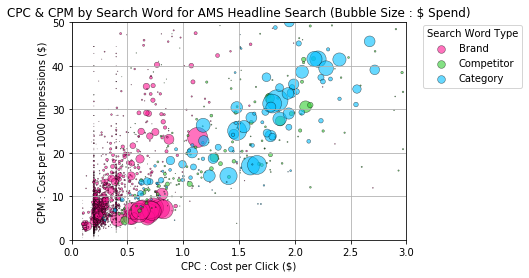

In [19]:
# Making scatter plots
# Add Title, Add labels to X and Y axes
plt.title("CPC & CPM by Search Word for AMS Headline Search (Bubble Size : $ Spend)")
plt.xlabel("CPC : Cost per Click ($)")
plt.ylabel("CPM : Cost per 1000 Impressions ($)")

# Set the limits for the X and Y axes
plt.xlim(0,3) 
plt.ylim(0,50) 

x_hs_bra = hs_bra_df["CPC"]
y_hs_bra = hs_bra_df["CPM"]
s_hs_bra = hs_bra_df["Spend"]

x_hs_com = hs_com_df["CPC"]
y_hs_com = hs_com_df["CPM"]
s_hs_com = hs_com_df["Spend"]

x_hs_cat = hs_cat_df["CPC"]
y_hs_cat = hs_cat_df["CPM"]
s_hs_cat = hs_cat_df["Spend"]

plt.scatter(x_hs_bra, y_hs_bra, s=s_hs_bra*0.3, color="deeppink", edgecolor="black", alpha=0.6, linewidth=0.5, label='Brand')
plt.scatter(x_hs_com, y_hs_com, s=s_hs_com*0.3, color="limegreen", edgecolor="black", alpha=0.6, linewidth=0.5, label='Competitor')
plt.scatter(x_hs_cat, y_hs_cat, s=s_hs_cat*0.3, color="deepskyblue", edgecolor="black", alpha=0.6, linewidth=0.5, label='Category')

handle = plt.legend(title="Search Word Type", loc=(1.05, 0.7))
for bubble in handle.legendHandles: 
   bubble.set_sizes([60])

plt.grid()

plt.savefig("../Output/HS_Word_CPC_CPI_Analysis.png", bbox_inches="tight")

plt.show()

In [20]:
# Cost - Sales Analysis
# Cost sum
hs_spend_bra = (hs_bra_df["Spend"].sum() / 1000).round(1)
hs_spend_com = (hs_com_df["Spend"].sum() / 1000).round(1)
hs_spend_cat = (hs_cat_df["Spend"].sum() / 1000).round(1)

# Sales sum
hs_sales_bra = (hs_bra_df["Sales"].sum() / 1000).round(1)
hs_sales_com = (hs_com_df["Sales"].sum() / 1000).round(1)
hs_sales_cat = (hs_cat_df["Sales"].sum() / 1000).round(1)

# Sales per Spend
hs_cost_per_sale_bra = hs_spend_bra / hs_sales_bra * 100
hs_cost_per_sale_com = hs_spend_com / hs_sales_com * 100
hs_cost_per_sale_cat = hs_spend_cat / hs_sales_cat * 100

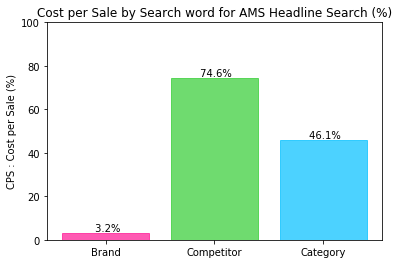

In [23]:
# Plot bar chart for Cost(Spend)
# Define x ticks, x axis, y axis
x_ticks = ["Brand", "Competitor", "Category"]
x_axis = np.arange(len(x_ticks))
y_axis = [hs_cost_per_sale_bra, hs_cost_per_sale_com, hs_cost_per_sale_cat]

# Add Title, Add labels to X and Y axes
plt.title("Cost per Sale by Search word for AMS Headline Search (%)")
plt.ylabel("CPS : Cost per Sale (%)")

# Plot
bar_plot = plt.bar(x_axis, y_axis, color='r', alpha=0.7, align="center")

# Change the colors
bar_plot[0].set_color('deeppink')
bar_plot[1].set_color('limegreen')
bar_plot[2].set_color('deepskyblue')

# set y axis limit
plt.ylim(0, 100)

# place value in each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+0.7, " "+str(height.round(1))+"%", color='black', ha='center')

# Place tick names
tick_location = [value for value in x_axis]
plt.xticks(tick_location, x_ticks)

plt.savefig("../Output/HS_CPS_Bar.png", bbox_inches="tight")

plt.show()

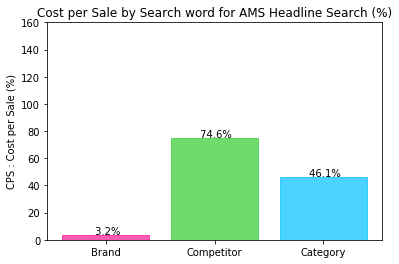

In [25]:
# Plot bar chart for Cost(Spend)
# Define x ticks, x axis, y axis
x_ticks = ["Brand", "Competitor", "Category"]
x_axis = np.arange(len(x_ticks))
y_axis = [hs_cost_per_sale_bra, hs_cost_per_sale_com, hs_cost_per_sale_cat]

# Add Title, Add labels to X and Y axes
plt.title("Cost per Sale by Search word for AMS Headline Search (%)")
plt.ylabel("CPS : Cost per Sale (%)")

# Plot
bar_plot = plt.bar(x_axis, y_axis, color='r', alpha=0.7, align="center")

# Change the colors
bar_plot[0].set_color('deeppink')
bar_plot[1].set_color('limegreen')
bar_plot[2].set_color('deepskyblue')

# set y axis limit
plt.ylim(0, 160)

# place value in each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+0.7, " "+str(height.round(1))+"%", color='black', ha='center')

# Place tick names
tick_location = [value for value in x_axis]
plt.xticks(tick_location, x_ticks)

plt.savefig("../Output/HS_CPS_Bar_2.png", bbox_inches="tight")

plt.show()

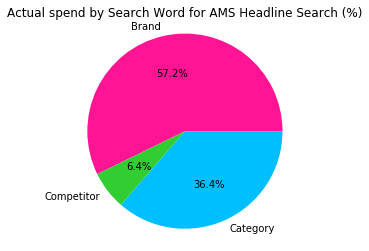

In [26]:
# data for pie chart
pies = ["Brand", "Competitor", "Category"]
pie_values = [hs_spend_bra, hs_spend_com, hs_spend_cat]
colors = ['deeppink', 'limegreen', 'deepskyblue']

# plot pie chart
plt.pie(pie_values, labels=pies, colors=colors, autopct="%1.1f%%")

# Set title
plt.title("Actual spend by Search Word for AMS Headline Search (%)")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Output/HS_Search_Word_Spend_Percentage.png", bbox_inches="tight")
plt.show()

In [27]:
# Detailed analysis on Sponsored Products
# Collecting all csv files in folder "Sponsored_Products"
csv_files = glob.glob('../Resources/Sponsored_Products/*.csv')
list = []

In [28]:
# concatenate csv files
for csv_file in csv_files:
    list.append(pd.read_csv(csv_file))
sp_df = pd.concat(list, ignore_index=True)

# export to csv files
sp_df.to_csv("../Output/combined_sponsored_products.csv")
sp_df.head()

,Status,Keywords,Match,Bid,Impr.,Clicks,CTR,ACPC,Spend,Sales,ACoS
0,Enabled,sony xperia dual sim unlocked,Broad,3.0,-,-,-,-,-,-,-
1,Enabled,sony xperia xz premium,Broad,3.0,-,-,-,-,-,-,-
2,Enabled,sony xperia smartphone unlocked,Broad,3.0,-,-,-,-,-,-,-
3,Enabled,xperia xz unlocked,Broad,3.0,-,-,-,-,-,-,-
4,Enabled,xperia xz dual,Broad,3.0,-,-,-,-,-,-,-


In [29]:
#add empty column "Search_Category"
sp_df["Search_Category"] = ""

In [30]:
# Iterate through DataFrame to assign Search Category
for index, row in sp_df.iterrows():
    if row["Keywords"].find("sony") >=0 or \
       row["Keywords"].find("xperia") >=0 or \
       row["Keywords"].find("experia") >=0 or \
       row["Keywords"].find("xz") >=0 or \
       row["Keywords"].find("xa") >=0 or \
       row["Keywords"].find("l1") >=0 or \
       row["Keywords"].find("l2") >=0 or \
       row["Keywords"].find("zx") >=0 or \
       row["Keywords"].find("x compact") >=0 or \
       row["Keywords"].find("xperia x") >=0 or \
       row["Keywords"].find("experia x") >=0 :
        sp_df.at[index, "Search_Category"] = "Brand"
                
    elif row["Keywords"].find("lg") >=0 or \
         row["Keywords"].find("moto") >=0 or \
         row["Keywords"].find("motorola") >=0 or \
         row["Keywords"].find("zte") >=0 or \
         row["Keywords"].find("htc") >=0 or \
         row["Keywords"].find("samsung") >=0 or \
         row["Keywords"].find("galaxy") >=0 or \
         row["Keywords"].find("huawei") >=0 or \
         row["Keywords"].find("asus") >=0 or \
         row["Keywords"].find("nokia") >=0 or \
         row["Keywords"].find("apple") >=0 or \
         row["Keywords"].find("iphone") >=0 or \
         row["Keywords"].find("blackberry") >=0 :
        sp_df.at[index, "Search_Category"] = "Competitor"
                
    elif row["Keywords"].find("verizon") >=0 or \
         row["Keywords"].find("att") >=0 or \
         row["Keywords"].find("at&t") >=0 or \
         row["Keywords"].find("tmobile") >=0 or \
         row["Keywords"].find("t-mobile") >=0 or \
         row["Keywords"].find("tmo") >=0 or \
         row["Keywords"].find("sprint") >=0 or \
         row["Keywords"].find("criket") >=0 or \
         row["Keywords"].find("tracfone") >=0 or \
         row["Keywords"].find("metropcs") >=0 or \
         row["Keywords"].find("metro pcs") >=0 :
        sp_df.at[index, "Search_Category"] = "Carrier"
                
    elif row["Keywords"].find("smartphone") >=0 or \
         row["Keywords"].find("unclocked") >=0 or \
         row["Keywords"].find("unlock") >=0 or \
         row["Keywords"].find("phone") >=0 or \
         row["Keywords"].find("mobile") >=0 or \
         row["Keywords"].find("android") >=0 or \
         row["Keywords"].find("cell") >=0 :
        sp_df.at[index, "Search_Category"] = "Category"
             
    else:
        sp_df.at[index, "Search_Category"] = "Others"       

sp_df.to_csv("../Output/combined_sponsored_products_w_search_category.csv")
sp_df.head()

,Status,Keywords,Match,Bid,Impr.,Clicks,CTR,ACPC,Spend,Sales,ACoS,Search_Category
0,Enabled,sony xperia dual sim unlocked,Broad,3.0,-,-,-,-,-,-,-,Brand
1,Enabled,sony xperia xz premium,Broad,3.0,-,-,-,-,-,-,-,Brand
2,Enabled,sony xperia smartphone unlocked,Broad,3.0,-,-,-,-,-,-,-,Brand
3,Enabled,xperia xz unlocked,Broad,3.0,-,-,-,-,-,-,-,Brand
4,Enabled,xperia xz dual,Broad,3.0,-,-,-,-,-,-,-,Brand


In [31]:
# converting strings to float
sp_df["Impr."] = sp_df["Impr."].replace([",", "-"], ["", "0"], regex=True).astype('float')
sp_df["Clicks"] = sp_df["Clicks"].replace([",", "-"], ["", "0"], regex=True).astype('float')
sp_df["Spend"] = sp_df["Spend"].replace([",", "-"], ["", "0"], regex=True).astype('float')
sp_df["Sales"] = sp_df["Sales"].replace([",", "-"], ["", "0"], regex=True).astype('float')

In [32]:
# Only rows with Clicks more than zero
sp_df = sp_df.loc[sp_df["Clicks"] > 0]

In [33]:
# Add CPI, CPC
sp_df["CPM"] = sp_df["Spend"] / sp_df["Impr."] * 1000
sp_df["CPC"] = sp_df["Spend"] / sp_df["Clicks"]
sp_df.head()

,Status,Keywords,Match,Bid,Impr.,Clicks,CTR,ACPC,Spend,Sales,ACoS,Search_Category,CPM,CPC
12,Enabled,sony xperia phones unlocked,Broad,3.0,2348.0,29.0,1.235%,0.57,16.47,0.00,-,Brand,7.014480,0.567931
16,Enabled,xperia unlocked,Broad,3.0,317.0,8.0,2.524%,0.45,3.57,0.00,-,Brand,11.261830,0.446250
18,Enabled,sony xperia unlocked,Broad,3.0,4548.0,29.0,0.638%,0.67,19.30,279.99,6.89%,Brand,4.243624,0.665517
20,Enabled,sony xperia phone,Broad,3.0,3317.0,33.0,0.995%,0.78,25.66,0.00,-,Brand,7.735906,0.777576
22,Enabled,sony phones unlocked,Broad,3.0,11929.0,123.0,1.031%,0.73,89.48,1719.91,5.20%,Brand,7.501048,0.727480


In [34]:
#Making DataFrame for each search term
sp_bra_df = sp_df[sp_df["Search_Category"] == "Brand"]
sp_com_df = sp_df[sp_df["Search_Category"] == "Competitor"]
sp_cat_df = sp_df[sp_df["Search_Category"] == "Category"]

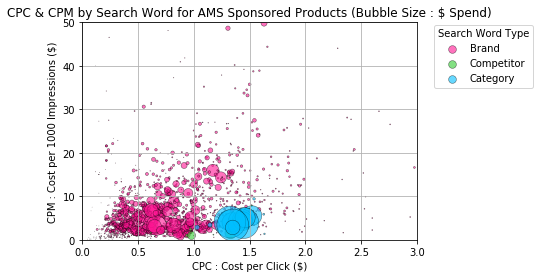

In [35]:
# Making scatter plots
# Add Title, Add labels to X and Y axes
plt.title("CPC & CPM by Search Word for AMS Sponsored Products (Bubble Size : $ Spend)")
plt.xlabel("CPC : Cost per Click ($)")
plt.ylabel("CPM : Cost per 1000 Impressions ($)")

# Set the limits for the X and Y axes
plt.xlim(0,3) 
plt.ylim(0,50) 

x_sp_bra = sp_bra_df["CPC"]
y_sp_bra = sp_bra_df["CPM"]
s_sp_bra = sp_bra_df["Spend"]

x_sp_com = sp_com_df["CPC"]
y_sp_com = sp_com_df["CPM"]
s_sp_com = sp_com_df["Spend"]

x_sp_cat = sp_cat_df["CPC"]
y_sp_cat = sp_cat_df["CPM"]
s_sp_cat = sp_cat_df["Spend"]

plt.scatter(x_sp_bra, y_sp_bra, s=s_sp_bra*0.3, color="deeppink", edgecolor="black", alpha=0.6, linewidth=0.5, label='Brand')
plt.scatter(x_sp_com, y_sp_com, s=s_sp_com*0.3, color="limegreen", edgecolor="black", alpha=0.6, linewidth=0.5, label='Competitor')
plt.scatter(x_sp_cat, y_sp_cat, s=s_sp_cat*0.3, color="deepskyblue", edgecolor="black", alpha=0.6, linewidth=0.5, label='Category')

handle = plt.legend(title="Search Word Type", loc=(1.05, 0.7))
for bubble in handle.legendHandles: 
   bubble.set_sizes([60])

plt.grid()

plt.savefig("../Output/SP_Word_CPC_CPI_Analysis.png", bbox_inches="tight")

plt.show()

In [36]:
# Cost - Sales Analysis
# Cost sum
sp_spend_bra = (sp_bra_df["Spend"].sum() / 1000).round(1)
sp_spend_com = (sp_com_df["Spend"].sum() / 1000).round(1)
sp_spend_cat = (sp_cat_df["Spend"].sum() / 1000).round(1)

# Sales sum
sp_sales_bra = (sp_bra_df["Sales"].sum() / 1000).round(1)
sp_sales_com = (sp_com_df["Sales"].sum() / 1000).round(1)
sp_sales_cat = (sp_cat_df["Sales"].sum() / 1000).round(1)

# Sales per Spend
sp_cost_per_sale_bra = sp_spend_bra / sp_sales_bra * 100
sp_cost_per_sale_com = sp_spend_com / sp_sales_com * 100
sp_cost_per_sale_cat = sp_spend_cat / sp_sales_cat * 100

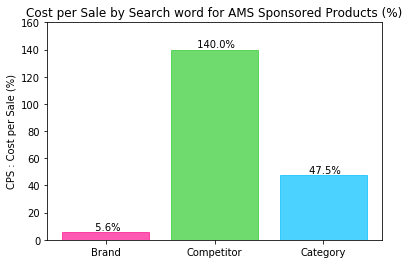

In [37]:
# Plot bar chart for Cost(Spend)
# Define x ticks, x axis, y axis
x_ticks = ["Brand", "Competitor", "Category"]
x_axis = np.arange(len(x_ticks))
y_axis = [sp_cost_per_sale_bra, sp_cost_per_sale_com, sp_cost_per_sale_cat]

# Add Title, Add labels to X and Y axes
plt.title("Cost per Sale by Search word for AMS Sponsored Products (%)")
plt.ylabel("CPS : Cost per Sale (%)")

# Plot
bar_plot = plt.bar(x_axis, y_axis, color='r', alpha=0.7, align="center")

# Change the colors
bar_plot[0].set_color('deeppink')
bar_plot[1].set_color('limegreen')
bar_plot[2].set_color('deepskyblue')

# set y axis limit
plt.ylim(0, 160)

# place value in each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+1.5, " "+str(height.round(1))+"%", color='black', ha='center')

# Place tick names
tick_location = [value for value in x_axis]
plt.xticks(tick_location, x_ticks)

plt.savefig("../Output/SP_CPS_Bar.png", bbox_inches="tight")

plt.show()

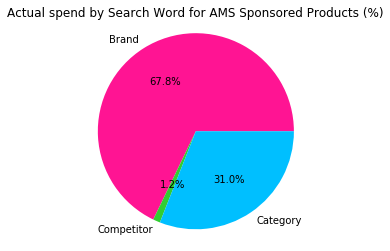

In [38]:
# data for pie chart
pies = ["Brand", "Competitor", "Category"]
pie_values = [sp_spend_bra, sp_spend_com, sp_spend_cat]
colors = ['deeppink', 'limegreen', 'deepskyblue']

# plot pie chart
plt.pie(pie_values, labels=pies, colors=colors, autopct="%1.1f%%")

# Set title
plt.title("Actual spend by Search Word for AMS Sponsored Products (%)")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("../Output/SP_Search_Word_Spend_Percentage.png", bbox_inches="tight")
plt.show()

In [39]:
# Making summary in DataFrame
summary_dict = [{"AMS Type": "Headline Search", "Target": "Brand", "Cost per Sale %": hs_cost_per_sale_bra, "Actual Spend %": (hs_spend_bra/(spend_pro + spend_spo + spend_head))*100},
                {"AMS Type": "Headline Search", "Target": "Competitor", "Cost per Sale %": hs_cost_per_sale_com, "Actual Spend %": (hs_spend_com/(spend_pro + spend_spo + spend_head))*100},
                {"AMS Type": "Headline Search", "Target": "Category", "Cost per Sale %": hs_cost_per_sale_cat, "Actual Spend %": (hs_spend_cat/(spend_pro + spend_spo + spend_head))*100},
                {"AMS Type": "Sponsored Products", "Target": "Brand", "Cost per Sale %": sp_cost_per_sale_bra, "Actual Spend %": (sp_spend_bra/(spend_pro + spend_spo + spend_head))*100},
                {"AMS Type": "Sponsored Products", "Target": "Competitor", "Cost per Sale %": sp_cost_per_sale_com, "Actual Spend %": (sp_spend_com/(spend_pro + spend_spo + spend_head))*100},
                {"AMS Type": "Sponsored Products", "Target": "Category", "Cost per Sale %": sp_cost_per_sale_cat, "Actual Spend %": (sp_spend_cat/(spend_pro + spend_spo + spend_head))*100},
                {"AMS Type": "Product Display", "Target": "Competitor/Category", "Cost per Sale %": cost_per_sale_pro, "Actual Spend %": (spend_pro/(spend_pro + spend_spo + spend_head))*100}]

summary_df = pd.DataFrame(summary_dict)
summary_df = summary_df[["AMS Type", "Target", "Cost per Sale %", "Actual Spend %"]]    
summary_df["Cost per Sale %"] = summary_df["Cost per Sale %"].round(1)
summary_df["Actual Spend %"] = summary_df["Actual Spend %"].round(1)

summary_df

,AMS Type,Target,Cost per Sale %,Actual Spend %
0,Headline Search,Brand,3.2,9.9
1,Headline Search,Competitor,74.6,1.1
2,Headline Search,Category,46.1,6.3
3,Sponsored Products,Brand,5.6,10.1
4,Sponsored Products,Competitor,140.0,0.2
5,Sponsored Products,Category,47.5,4.6
6,Product Display,Competitor/Category,6.6,28.3


In [40]:
# Decide how we allocate our investment between "HS Brand" and "PD"
Threshhold_Overall_CPS = 5.0
spend_for_pd = (Threshhold_Overall_CPS * 100 - hs_cost_per_sale_bra * 100) / (cost_per_sale_pro - hs_cost_per_sale_bra)
spend_for_pd

52.58836644848092

In [41]:
summary_df["Proposed Spend %"] = [(100 - spend_for_pd).round(1), 0, 0, 0, 0, 0, spend_for_pd.round(1)]
summary_df.to_csv("../Output/summary.csv")
summary_df

,AMS Type,Target,Cost per Sale %,Actual Spend %,Proposed Spend %
0,Headline Search,Brand,3.2,9.9,47.4
1,Headline Search,Competitor,74.6,1.1,0.0
2,Headline Search,Category,46.1,6.3,0.0
3,Sponsored Products,Brand,5.6,10.1,0.0
4,Sponsored Products,Competitor,140.0,0.2,0.0
5,Sponsored Products,Category,47.5,4.6,0.0
6,Product Display,Competitor/Category,6.6,28.3,52.6


In [42]:
# Detailed analysis on Headline Search
# Collecting all csv files in folder "Headline_Search_Date_Order"
csv_files = glob.glob('../Resources/Headline_Search_Date_Order/*.csv')
hs_bra_cps_list = []

In [43]:
# loop csv_file
for csv_file in csv_files:
    # Make DataFrame from csv
    hs_date_df = pd.read_csv(csv_file)
    
    # converting strings to float
    hs_date_df["Spend"] = hs_date_df["Spend"].replace(",", "", regex=True).astype('float')
    hs_date_df["Sales"] = hs_date_df["Sales"].replace(",", "", regex=True).astype('float')
    
    # add empty column "Search_Category"
    hs_date_df["Search_Category"] = ""
    
    # Iterate through DataFrame to assign Search Category
    for index, row in hs_date_df.iterrows():
        if row["Keywords"].find("sony") >=0 or \
           row["Keywords"].find("xperia") >=0 or \
           row["Keywords"].find("experia") >=0 or \
           row["Keywords"].find("xz") >=0 or \
           row["Keywords"].find("xa") >=0 or \
           row["Keywords"].find("l1") >=0 or \
           row["Keywords"].find("l2") >=0 or \
           row["Keywords"].find("zx") >=0 or \
           row["Keywords"].find("x compact") >=0 or \
           row["Keywords"].find("xperia x") >=0 or \
           row["Keywords"].find("experia x") >=0 :
            hs_date_df.at[index, "Search_Category"] = "Brand"
                
        elif row["Keywords"].find("lg") >=0 or \
             row["Keywords"].find("moto") >=0 or \
             row["Keywords"].find("motorola") >=0 or \
             row["Keywords"].find("zte") >=0 or \
             row["Keywords"].find("htc") >=0 or \
             row["Keywords"].find("samsung") >=0 or \
             row["Keywords"].find("galaxy") >=0 or \
             row["Keywords"].find("huawei") >=0 or \
             row["Keywords"].find("asus") >=0 or \
             row["Keywords"].find("nokia") >=0 or \
             row["Keywords"].find("apple") >=0 or \
             row["Keywords"].find("iphone") >=0 or \
             row["Keywords"].find("blackberry") >=0 :
            hs_date_df.at[index, "Search_Category"] = "Competitor"
                
        elif row["Keywords"].find("verizon") >=0 or \
             row["Keywords"].find("att") >=0 or \
             row["Keywords"].find("at&t") >=0 or \
             row["Keywords"].find("tmobile") >=0 or \
             row["Keywords"].find("t-mobile") >=0 or \
             row["Keywords"].find("tmo") >=0 or \
             row["Keywords"].find("sprint") >=0 or \
             row["Keywords"].find("criket") >=0 or \
             row["Keywords"].find("tracfone") >=0 or \
             row["Keywords"].find("metropcs") >=0 or \
             row["Keywords"].find("metro pcs") >=0 :
            hs_date_df.at[index, "Search_Category"] = "Carrier"
                
        elif row["Keywords"].find("smartphone") >=0 or \
             row["Keywords"].find("unclocked") >=0 or \
             row["Keywords"].find("unlock") >=0 or \
             row["Keywords"].find("phone") >=0 or \
             row["Keywords"].find("mobile") >=0 or \
             row["Keywords"].find("android") >=0 or \
             row["Keywords"].find("cell") >=0 :
            hs_date_df.at[index, "Search_Category"] = "Category"
             
        else:
            hs_date_df.at[index, "Search_Category"] = "Others"       

    # Making Data Frame with only "Brand" search words
    hs_date_bra_df = hs_date_df[hs_date_df["Search_Category"] == "Brand"]
    
    # Calculating Cost per Sales
    cost_per_sale_hs_date = hs_date_bra_df["Spend"].sum() / hs_date_bra_df["Sales"].sum() * 100
    
    # Adding Cost per Sales in the list
    hs_bra_cps_list.append(cost_per_sale_hs_date)

In [44]:
hs_bra_cps_list

[6.250228110514983,
 3.1453613268877203,
 3.6172117217586903,
 3.4395177459973545,
 1.94678360622805,
 3.2433520043801325,
 3.7837807893663618,
 4.3809101525882035,
 4.003389168737309,
 4.29475988863127,
 4.46619930511557,
 5.5160123909724135,
 6.42219305446094,
 10.730352182095167,
 4.795683070686879,
 4.203901800404238,
 4.201487869498185,
 4.258930020239916,
 5.397911367437775,
 4.8024321106172705,
 3.907981168234789,
 3.4930524046469005,
 3.8764764479863394,
 2.076594017581253,
 2.2606528224068505,
 1.94823132492253,
 2.1365050190055612,
 0.8571603502112289,
 1.2678850777295436,
 1.5567079111764763,
 1.8490058351865564,
 2.6901933999455476,
 3.042954481187804,
 1.558493613144015,
 2.2801984966184383,
 2.0486270090045666,
 2.3210048769494103,
 1.2344955333067598,
 1.3855986790919075,
 2.014562600192328,
 3.0357911674402795,
 3.877031087762245,
 3.395314571975836,
 5.53892699261261,
 5.307241006638875,
 5.376830962118616,
 4.632622592007421]

In [45]:
np.mean(hs_bra_cps_list)

3.5717135560787887

In [46]:
# Detailed analysis on Sponsored Products
# Collecting all csv files in folder "Sponsored_Products_Date_Order"
csv_files = glob.glob('../Resources/Sponsored_Products_Date_Order/*.csv')
sp_bra_cps_list = []

In [47]:
# loop csv_file
for csv_file in csv_files:
    # Make DataFrame from csv
    sp_date_df = pd.read_csv(csv_file)
    
    # converting strings to float
    sp_date_df["Spend"] = sp_date_df["Spend"].replace([",", "-"], ["", "0"], regex=True).astype('float')
    sp_date_df["Sales"] = sp_date_df["Sales"].replace([",", "-"], ["", "0"], regex=True).astype('float')
    
    # add empty column "Search_Category"
    sp_date_df["Search_Category"] = ""
    
    # Iterate through DataFrame to assign Search Category
    for index, row in sp_date_df.iterrows():
        if row["Keywords"].find("sony") >=0 or \
           row["Keywords"].find("xperia") >=0 or \
           row["Keywords"].find("experia") >=0 or \
           row["Keywords"].find("xz") >=0 or \
           row["Keywords"].find("xa") >=0 or \
           row["Keywords"].find("l1") >=0 or \
           row["Keywords"].find("l2") >=0 or \
           row["Keywords"].find("zx") >=0 or \
           row["Keywords"].find("x compact") >=0 or \
           row["Keywords"].find("xperia x") >=0 or \
           row["Keywords"].find("experia x") >=0 :
            sp_date_df.at[index, "Search_Category"] = "Brand"
                
        elif row["Keywords"].find("lg") >=0 or \
             row["Keywords"].find("moto") >=0 or \
             row["Keywords"].find("motorola") >=0 or \
             row["Keywords"].find("zte") >=0 or \
             row["Keywords"].find("htc") >=0 or \
             row["Keywords"].find("samsung") >=0 or \
             row["Keywords"].find("galaxy") >=0 or \
             row["Keywords"].find("huawei") >=0 or \
             row["Keywords"].find("asus") >=0 or \
             row["Keywords"].find("nokia") >=0 or \
             row["Keywords"].find("apple") >=0 or \
             row["Keywords"].find("iphone") >=0 or \
             row["Keywords"].find("blackberry") >=0 :
            sp_date_df.at[index, "Search_Category"] = "Competitor"
                
        elif row["Keywords"].find("verizon") >=0 or \
             row["Keywords"].find("att") >=0 or \
             row["Keywords"].find("at&t") >=0 or \
             row["Keywords"].find("tmobile") >=0 or \
             row["Keywords"].find("t-mobile") >=0 or \
             row["Keywords"].find("tmo") >=0 or \
             row["Keywords"].find("sprint") >=0 or \
             row["Keywords"].find("criket") >=0 or \
             row["Keywords"].find("tracfone") >=0 or \
             row["Keywords"].find("metropcs") >=0 or \
             row["Keywords"].find("metro pcs") >=0 :
            sp_date_df.at[index, "Search_Category"] = "Carrier"
                
        elif row["Keywords"].find("smartphone") >=0 or \
             row["Keywords"].find("unclocked") >=0 or \
             row["Keywords"].find("unlock") >=0 or \
             row["Keywords"].find("phone") >=0 or \
             row["Keywords"].find("mobile") >=0 or \
             row["Keywords"].find("android") >=0 or \
             row["Keywords"].find("cell") >=0 :
            sp_date_df.at[index, "Search_Category"] = "Category"
             
        else:
            sp_date_df.at[index, "Search_Category"] = "Others"       

    # Making Data Frame with only "Brand" search words
    sp_date_bra_df = sp_date_df[hs_date_df["Search_Category"] == "Brand"]
    
    # Calculating Cost per Sales
    cost_per_sale_sp_date = sp_date_bra_df["Spend"].sum() / sp_date_bra_df["Sales"].sum() * 100
    
    # Adding Cost per Sales in the list
    sp_bra_cps_list.append(cost_per_sale_sp_date)

C:\Users\22715991\Anaconda\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [48]:
sp_bra_cps_list

[2.988105058676389,
 4.221299341727368,
 11.412714964916312,
 4.097495382288084,
 4.0966444378037465,
 3.8467811505137908,
 7.950906522251,
 11.187638625051735,
 6.2833737558746865,
 5.166213384492239,
 5.723243228394042,
 5.579247587853301,
 6.596376609235338,
 4.55913972619207,
 8.394541858134398,
 11.258857147803639,
 8.09843036962163,
 8.664739626458296,
 5.750557814250058,
 13.742146152746763,
 5.754574856986336,
 6.196123764618455,
 13.023033999255059,
 22.553991524038715,
 20.85072074108308,
 19.317376323177644,
 21.54168616217985,
 16.67774874644935,
 25.882467181111767,
 23.44332124762888,
 15.824187031182413]

In [49]:
np.mean(sp_bra_cps_list)

10.667215623290208

In [50]:
# t-test
(t_stat, p) = ttest_ind(hs_bra_cps_list, sp_bra_cps_list, equal_var=False)
p

2.5734104230068707e-06

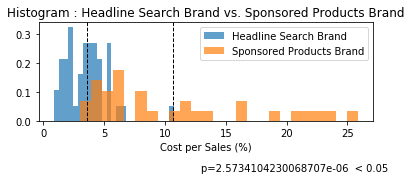

In [51]:
# Histogram Plot of Data
plt.subplot(2, 1, 1)
plt.hist(hs_bra_cps_list, 25, density=True, alpha=0.7, label="Headline Search Brand")
plt.hist(sp_bra_cps_list, 25, density=True, alpha=0.7, label="Sponsored Products Brand")
plt.axvline(np.mean(hs_bra_cps_list), color='k', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(sp_bra_cps_list), color='k', linestyle='dashed', linewidth=1)
plt.title("Histogram : Headline Search Brand vs. Sponsored Products Brand")
plt.xlabel("Cost per Sales (%)")
plt.legend()  
plt.text(13, -0.17, "p=" + str(p) + "  < 0.05")
plt.savefig("../Output/hs_sp_bra_hist.png", bbox_inches="tight")

In [57]:
# Calculate CPMs
cpm_hs_com = hs_com_df["Spend"].sum() / hs_com_df["Impr."].sum() * 1000
cpm_hs_cat = hs_cat_df["Spend"].sum() / hs_cat_df["Impr."].sum() * 1000
cpm_sp_com = sp_com_df["Spend"].sum() / sp_com_df["Impr."].sum() * 1000
cpm_sp_cat = sp_cat_df["Spend"].sum() / sp_cat_df["Impr."].sum() * 1000

In [60]:
cpm_facebook = 11.17
cpm_twitter = 5.9
cpm_you_tube = 9.68

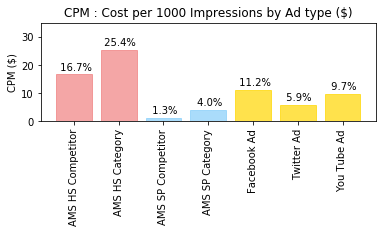

In [69]:
# Plot bar chart for CPM Comparison
plt.subplot(2, 1, 1)

# Define x ticks, x axis, y axis
x_ticks = ["AMS HS Competitor", "AMS HS Category", "AMS SP Competitor", "AMS SP Category", "Facebook Ad", "Twitter Ad", "You Tube Ad"]
x_axis = np.arange(len(x_ticks))
y_axis = [cpm_hs_com, cpm_hs_cat, cpm_sp_com, cpm_sp_cat, cpm_facebook, cpm_twitter, cpm_you_tube]

# Add Title, Add labels to X and Y axes
plt.title("CPM : Cost per 1000 Impressions by Ad type ($)")
plt.ylabel("CPM ($)")

# Plot
bar_plot = plt.bar(x_axis, y_axis, color='r', alpha=0.7, align="center")

# Change the colors
bar_plot[0].set_color('lightcoral')
bar_plot[1].set_color('lightcoral')
bar_plot[2].set_color('lightskyblue')
bar_plot[3].set_color('lightskyblue')
bar_plot[4].set_color('gold')
bar_plot[5].set_color('gold')
bar_plot[6].set_color('gold')

# set y axis limit
plt.ylim(0, 35)

# place value in each bar
for bar in bar_plot:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height+1.5, " "+str(height.round(1))+"%", color='black', ha='center')

# Place tick names
tick_location = [value for value in x_axis]
plt.xticks(tick_location, x_ticks, rotation=90)

plt.savefig("../Output/CPM_Comparison_Bar.png", bbox_inches="tight")

plt.show()